# Практическое занятие №3 

1 часть

In [1]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class TreeNode:
    def __init__(self, key=None):
        self.key = key
        self.left = None
        self.right = None
        
    def __str__(self):
        return f"Tree({self.key})"
    
    #сравнивaем добавляемое значение(key) с текущим(self.key), потому что
    #нужно понять идти налево или направо. А если там None, то добавляем новый узел

    def enter(self, key):
        if self.key is None:
            self.key = key
        
        if key < self.key:
            if self.left is None:
                self.left = TreeNode(key)
            else:
                self.left.enter(key)
                
        elif key >= self.key:
            if self.right is None:
                self.right = TreeNode(key)
            else:
                self.right.enter(key)
                
    #красиво выводим дерево
             
    def print_hierarchy(self, level=0):
        print(f"#{level} = {self.key} | left = {self.left} | right = {self.right}")
        
        if self.left  is not None: 
            self.left.print_hierarchy(level+1)
        if self.right is not None: 
            self.right.print_hierarchy(level+1)
                

In [3]:
# выводит массив из дерева от родителя до всех его потомков
def pre_order(name_tree, mass):
    if name_tree:
        pre_order(name_tree.left, mass)
        mass.append(name_tree.key)
        pre_order(name_tree.right, mass)
    return mass

In [4]:
#n - количество элементов, end_range - конец диапазона генерируемых чисел
def print_tree(n, end_range):
    tree = TreeNode()
    for i in range(n):
        a = random.randint(1, end_range)
        tree.enter(a)
    tree.print_hierarchy()
    return tree

In [5]:
#создаёт дерево и преносит в масcив
def create_tree(n, end_range):
    tree = TreeNode()
    for i in range(n):
        a = random.randint(1, end_range)
        tree.enter(a)

In [6]:
tree = print_tree(25, 50)

#0 = 18 | left = Tree(1) | right = Tree(18)
#1 = 1 | left = None | right = Tree(4)
#2 = 4 | left = None | right = Tree(13)
#3 = 13 | left = Tree(12) | right = None
#4 = 12 | left = Tree(10) | right = None
#5 = 10 | left = Tree(7) | right = None
#6 = 7 | left = Tree(6) | right = Tree(7)
#7 = 6 | left = None | right = None
#7 = 7 | left = None | right = None
#1 = 18 | left = None | right = Tree(45)
#2 = 45 | left = Tree(39) | right = None
#3 = 39 | left = Tree(22) | right = Tree(43)
#4 = 22 | left = Tree(19) | right = Tree(36)
#5 = 19 | left = Tree(18) | right = None
#6 = 18 | left = None | right = None
#5 = 36 | left = Tree(34) | right = Tree(36)
#6 = 34 | left = Tree(26) | right = None
#7 = 26 | left = Tree(23) | right = Tree(33)
#8 = 23 | left = None | right = None
#8 = 33 | left = Tree(28) | right = None
#9 = 28 | left = None | right = None
#6 = 36 | left = None | right = Tree(38)
#7 = 38 | left = Tree(37) | right = None
#8 = 37 | left = None | right = None
#4 = 43 | left = Tree(39) 

In [7]:
mass = []
pre_order(tree, mass)

[1,
 4,
 6,
 7,
 7,
 10,
 12,
 13,
 18,
 18,
 18,
 19,
 22,
 23,
 26,
 28,
 33,
 34,
 36,
 36,
 37,
 38,
 39,
 39,
 43,
 45]

In [52]:
df = pd.DataFrame(columns=["количество элементов дерева/массива", "диапазон чисел", "время работы алгоритма с деревом", "время работы алгоритма с массивом"])
df

,количество элементов дерева/массива,диапазон чисел,время работы алгоритма с деревом,время работы алгоритма с массивом


In [53]:
a = [1000, 1000, 5000, 5000, 10000, 10000]

for i in range(len(a)):
    df.loc[i,'количество элементов дерева/массива'] = a[i]
    
    if i % 2 == 0:
        df.loc[i,'диапазон чисел'] = "от 1 до 500"
    else:
        df.loc[i,'диапазон чисел'] = "от 1 до 10000"
df
    

,количество элементов дерева/массива,диапазон чисел,время работы алгоритма с деревом,время работы алгоритма с массивом
0,1000,от 1 до 500,NaN,NaN
1,1000,от 1 до 10000,NaN,NaN
2,5000,от 1 до 500,NaN,NaN
3,5000,от 1 до 10000,NaN,NaN
4,10000,от 1 до 500,NaN,NaN
5,10000,от 1 до 10000,NaN,NaN


In [54]:
time500 =[]
mass=[]
tree = create_tree(1000, 500)
start = time.perf_counter()
pre_order(tree, mass)
df.loc[0,"время работы алгоритма с деревом"] = time.perf_counter()-start
time500.append(time.perf_counter()-start)

In [55]:
time1000 =[]
mass=[]
tree = create_tree(1000, 10000)
start = time.perf_counter()
pre_order(tree, mass)
df.loc[1,"время работы алгоритма с деревом"] = time.perf_counter()-start
time1000.append(time.perf_counter()-start)

In [56]:
mass=[]
tree = create_tree(5000, 500)
start = time.perf_counter()
pre_order(tree, mass)
df.loc[2,"время работы алгоритма с деревом"] = time.perf_counter()-start
time500.append(time.perf_counter()-start)

In [57]:
mass=[]
tree = create_tree(5000, 10000)
start = time.perf_counter()
pre_order(tree, mass)
df.loc[3,"время работы алгоритма с деревом"] = time.perf_counter()-start
time1000.append(time.perf_counter()-start)

In [58]:
mass=[]
tree = create_tree(10000, 500)
start = time.perf_counter()
pre_order(tree, mass)
df.loc[4,"время работы алгоритма с деревом"] = time.perf_counter()-start
time500.append(time.perf_counter()-start)

In [59]:
mass=[]
tree = create_tree(10000, 10000)
start = time.perf_counter()
pre_order(tree, mass)
df.loc[5,"время работы алгоритма с деревом"] = time.perf_counter()-start
time1000.append(time.perf_counter()-start)
df

,количество элементов дерева/массива,диапазон чисел,время работы алгоритма с деревом,время работы алгоритма с массивом
0,1000,от 1 до 500,0.000269,NaN
1,1000,от 1 до 10000,0.000208,NaN
2,5000,от 1 до 500,0.00036,NaN
3,5000,от 1 до 10000,0.000155,NaN
4,10000,от 1 до 500,0.000211,NaN
5,10000,от 1 до 10000,0.000217,NaN


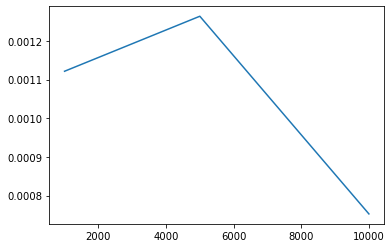

In [60]:
plt.plot([1000, 5000,  10000] , time500)
plt.show()

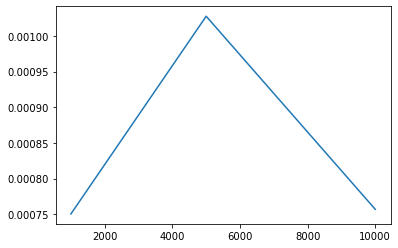

In [61]:
plt.plot([1000, 5000,  10000] , time1000)
plt.show()

In [62]:
#n - количество элементов, end_range - конец диапазона генерируемых чисел
def gen_mass(n, end_range):
    return [random.randint(1, end_range) for i in range(n)] 

In [63]:
time500 =[]
start = time.perf_counter()
sorted(gen_mass(1000, 500))
df.loc[0,"время работы алгоритма с массивом"] = time.perf_counter()-start
time500.append(time.perf_counter()-start)

In [64]:
time1000 =[]
start = time.perf_counter()
sorted(gen_mass(1000, 10000))
df.loc[1,"время работы алгоритма с массивом"] = time.perf_counter()-start
time1000.append(time.perf_counter()-start)

In [65]:
start = time.perf_counter()
sorted(gen_mass(5000, 500))
df.loc[2,"время работы алгоритма с массивом"] = time.perf_counter()-start
time500.append(time.perf_counter()-start)

In [66]:
start = time.perf_counter()
sorted(gen_mass(5000, 10000))
df.loc[3,"время работы алгоритма с массивом"] = time.perf_counter()-start
time1000.append(time.perf_counter()-start)

In [67]:
start = time.perf_counter()
sorted(gen_mass(10000, 500))
df.loc[4,"время работы алгоритма с массивом"] = time.perf_counter()-start
time500.append(time.perf_counter()-start)

In [68]:
start = time.perf_counter()
sorted(gen_mass(10000, 10000))
df.loc[5,"время работы алгоритма с массивом"] = time.perf_counter()-start
time1000.append(time.perf_counter()-start)
df

,количество элементов дерева/массива,диапазон чисел,время работы алгоритма с деревом,время работы алгоритма с массивом
0,1000,от 1 до 500,0.000269,0.003787
1,1000,от 1 до 10000,0.000208,0.002673
2,5000,от 1 до 500,0.00036,0.009588
3,5000,от 1 до 10000,0.000155,0.027521
4,10000,от 1 до 500,0.000211,0.043275
5,10000,от 1 до 10000,0.000217,0.069131


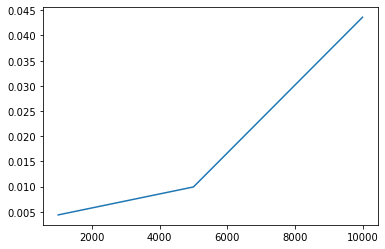

In [69]:
plt.plot([1000, 5000,  10000] , time500)
plt.show()

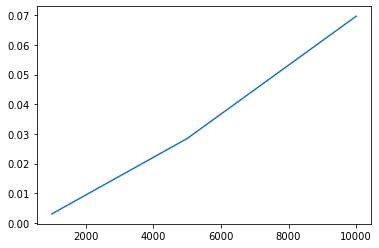

In [70]:
plt.plot([1000, 5000,  10000] , time1000)
plt.show()

2 часть

In [24]:
tree = TreeNode()
for i in range(5):
    a = random.randint(1, 20)
    tree.enter(a)
tree.print_hierarchy()

#0 = 11 | left = None | right = Tree(11)
#1 = 11 | left = None | right = Tree(20)
#2 = 20 | left = Tree(17) | right = None
#3 = 17 | left = None | right = Tree(18)
#4 = 18 | left = None | right = Tree(18)
#5 = 18 | left = None | right = None


In [9]:
#функция определяет максимальную высоту дерева
def height(name_tree):
    if not name_tree:
        return 0
    
    left_height = height(name_tree.left) 
    right_height = height(name_tree.right) 
    return max(left_height, right_height) + 1

In [11]:
height(tree)

10

In [36]:
def delete(root, key):
    old_lenght = []
    old_lenght = len(pre_order(root, old_lenght))
    lenght_past_delete = []
    root = deleteNode(root, key)
    lenght_past_delete = len(pre_order(root, lenght_past_delete))
    
    if old_lenght == lenght_past_delete:
        print("Такого элемента нет")
        return root
    
    while old_lenght != lenght_past_delete:
        old_lenght = []
        old_lenght = len(pre_order(root, old_lenght))
        lenght_past_delete = []
        root = deleteNode(root, key)
        lenght_past_delete = len(pre_order(root, lenght_past_delete))
    
        
    return root



def minValueNode(node):
    current = node
  
    while(current.left is not None):
        current = current.left
  
    return current

def deleteNode(root, key):

    if root is None:
        return root

    if key < root.key:
        root.left = deleteNode(root.left, key)

    elif(key > root.key):
        root.right = deleteNode(root.right, key)

    else:
        if root.left is None:
            temp = root.right
            root = None
            return temp

        elif root.right is None:
            temp = root.left
            root = None
            return temp

        temp = minValueNode(root.right)

        root.key = temp.key

        root.right = deleteNode(root.right, temp.key)

    return root

In [37]:
tree.print_hierarchy()


#0 = 11 | left = None | right = Tree(11)
#1 = 11 | left = None | right = Tree(20)
#2 = 20 | left = Tree(17) | right = None
#3 = 17 | left = None | right = Tree(18)
#4 = 18 | left = None | right = Tree(18)
#5 = 18 | left = None | right = None


In [38]:
x = 11

tree = delete(tree, x)
tree.print_hierarchy()

5 4
4 4
#0 = 20 | left = Tree(17) | right = None
#1 = 17 | left = None | right = Tree(18)
#2 = 18 | left = None | right = Tree(18)
#3 = 18 | left = None | right = None
